In [2]:
import sys
sys.path.append('/Users/aimeebarciauskas/Library/Python/3.6/lib/python/site-packages')
sys.path.append('/Users/aimeebarciauskas/Projects/ifsc/')
import psycopg2
import helpers
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from scipy import stats

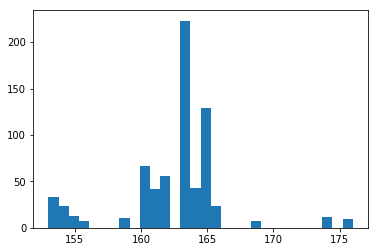

162.42632331902718

In [3]:
where_query = """
athletes.height is not NULL and bouldering_comp_results.category = 'womens_bouldering'
"""
common_params = (
    'athletes.height',
    'bouldering_comp_results join athletes on athletes.id = bouldering_comp_results.athlete_id'
)
# Heights for all female boulderers
all_wboulder_heights = helpers.format_rows(helpers.fetch_all(*common_params, where_query))

plt.hist(all_wboulder_heights, bins=30)
plt.show()
np.mean(all_wboulder_heights)

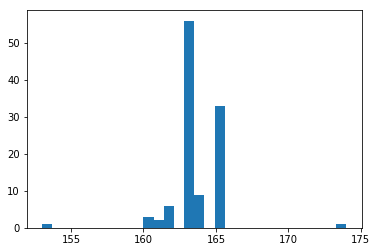

163.51351351351352

In [4]:
first_place_where_query = '{0} and bouldering_comp_results.comp_stage_rank = 1'.format(where_query)
firsts_wboulder_heights = helpers.format_rows(helpers.fetch_all(*common_params, first_place_where_query))

plt.hist(firsts_wboulder_heights, bins=30)
plt.show()
np.mean(firsts_wboulder_heights)

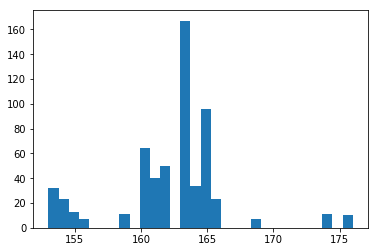

162.22108843537416

In [5]:
other_place_where_query = '{0} and bouldering_comp_results.comp_stage_rank > 1'.format(where_query)
other_wboulder_heights = helpers.format_rows(helpers.fetch_all(*common_params, other_place_where_query))

plt.hist(other_wboulder_heights, bins=30)
plt.show()
np.mean(other_wboulder_heights)

In [6]:
test_stats = stats.mannwhitneyu(firsts_wboulder_heights, other_wboulder_heights)
test_stats.pvalue

1.3952752701634355e-05

In [7]:
pvalues = helpers.run_tests(firsts_wboulder_heights, other_wboulder_heights, stats.mannwhitneyu)
np.sum(np.array(pvalues) <= 0.05)/len(pvalues)

0.46635336466353366

In [9]:
pvalues = helpers.run_tests(firsts_wboulder_heights, other_wboulder_heights)
np.sum(np.array(pvalues) <= 0.05)/len(pvalues)

0.3160683931606839